In [ ]:
# Handling Missing Numerical Data
# Mean / Median Imputation
# Code Demo
# Imputation using SKlearn
# Arbitarry Value Imputation
# Code Demo
# End of Distribution Imputation
# Outro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [75]:
df = pd.read_csv('C:/Users/HP/Desktop/100 Days Machine learning/Csv.files/train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [77]:
df['Family'] = df['SibSp']+df['Parch']

In [79]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [81]:
df = df[['Age','Fare','Family','Survived']]

In [83]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      887 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [89]:
df.isnull().mean()

Age         0.198653
Fare        0.004489
Family      0.000000
Survived    0.000000
dtype: float64

In [91]:
X = df.drop(columns=['Survived'])
y = df['Survived']


In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)


In [98]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [100]:
X_train.isnull().mean()

Age       0.207865
Fare      0.005618
Family    0.000000
dtype: float64

In [102]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [112]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [143]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
334,NaN,133.6500,1,28.75,29.785904,133.6500,133.6500
30,40.0,27.7208,0,40.00,40.000000,27.7208,27.7208
298,NaN,30.5000,0,28.75,29.785904,30.5000,30.5000
539,22.0,49.5000,2,22.00,22.000000,49.5000,49.5000
124,54.0,77.2875,1,54.00,54.000000,77.2875,77.2875


In [155]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age variance after median imputation: ', X_train['Age_median'].var())
print('Age variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare variance after median imputation: ', X_train['Fare_median'].var())
print('Fare variance after mean imputation: ', X_train['Fare_mean'].var())



Original Age variable variance:  204.3495133904614
Age variance after median imputation:  161.9895663346054
Age variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2377.2723731826773
Fare variance after median imputation:  2365.6822166979914
Fare variance after mean imputation:  2363.8981263574583


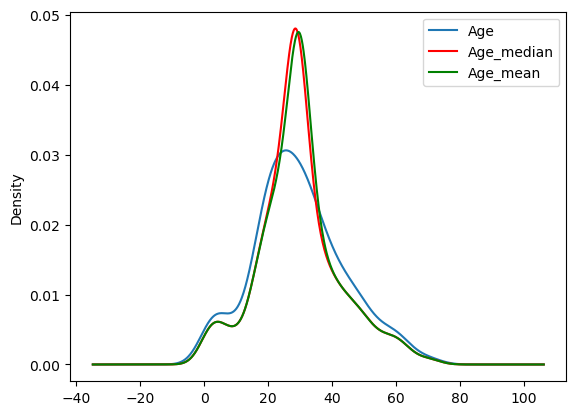

In [157]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

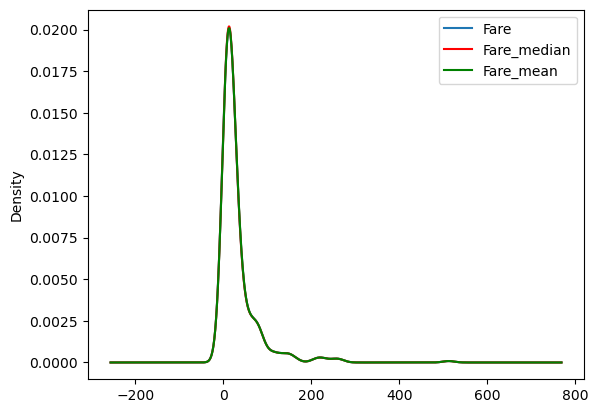

In [161]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [163]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,71.644209,-6.498901,204.349513,204.349513,71.484606,71.403029
Fare,71.644209,2377.272373,16.370920,59.262535,56.859838,2377.272373,2377.272373
Family,-6.498901,16.370920,2.735252,-5.112563,-5.146106,16.121344,16.278819
Age_median,204.349513,59.262535,-5.112563,161.989566,161.812625,59.024131,58.929131
Age_mean,204.349513,56.859838,-5.146106,161.812625,161.812625,56.604548,56.539952
Fare_median,71.484606,2377.272373,16.121344,59.024131,56.604548,2365.682217,2363.898126
Fare_mean,71.403029,2377.272373,16.278819,58.929131,56.539952,2363.898126,2363.898126


In [165]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.095695,-0.299113,1.000000,1.000000,0.095794,0.095711
Fare,0.095695,1.000000,0.207014,0.095231,0.091420,1.000000,1.000000
Family,-0.299113,0.207014,1.000000,-0.242883,-0.244610,0.200412,0.202446
Age_median,1.000000,0.095231,-0.242883,1.000000,0.999454,0.095347,0.095230
Age_mean,1.000000,0.091420,-0.244610,0.999454,1.000000,0.091489,0.091419
Fare_median,0.095794,1.000000,0.200412,0.095347,0.091489,1.000000,0.999623
Fare_mean,0.095711,1.000000,0.202446,0.095230,0.091419,0.999623,1.000000


<Axes: >

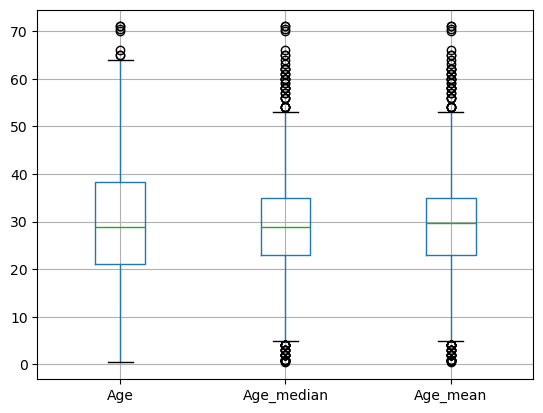

In [167]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

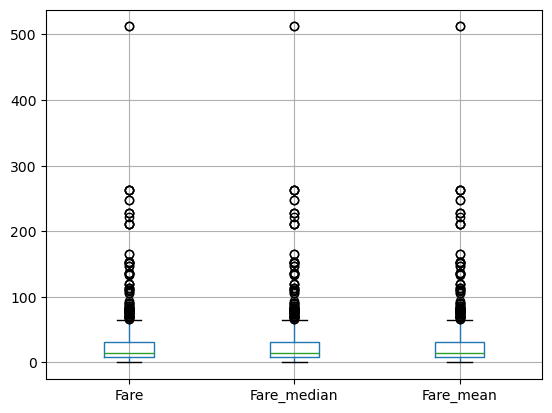

In [171]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# Using Sklearn

In [174]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)


In [176]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [180]:
trf = ColumnTransformer([
    ('imputer1', imputer1,['Age']),
    ('imputer2', imputer2,['Fare'])
],remainder='passthrough')

In [182]:
trf.fit(X_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [184]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [186]:
trf.named_transformers_['imputer2'].statistics_

array([32.33730523])

In [188]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [194]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])